In [7]:
from platform import python_version

print(python_version())

3.9.7


In [8]:
import os
import pandas as pd
import re
i = 0
filepaths = []
# "C:/Users/janja/Desktop/firstData"
for root, dirs, files in os.walk("C:/Users/janja/OneDrive/Pulpit/DaneMGR", topdown=True):
    for name in dirs:
        if (bool(re.findall('\d$', name)) == False):
            Path = (root + '/' + name)
            filepaths.append(re.sub('DaneMGR\\\\', 'DaneMGR/', Path))

In [9]:
from os import walk
filenameList = []
fullPath = []
for Path in filepaths:
    for (dirpath, dirnames, filenames) in walk(Path):
        for name in filenames:
            if (bool(re.findall('fast_Unknown', name)) == True) and name not in filenameList:
                NewName = re.sub('._CsvLog', 'CsvLog', name)
                filenameList.append(NewName)
                fullPath.append(Path + '/' + NewName)

In [10]:
'''
print(filepaths)
print('\n')
print(filenameList)
print('\n')
print(fullPath)
'''

"\nprint(filepaths)\nprint('\n')\nprint(filenameList)\nprint('\n')\nprint(fullPath)\n"

In [11]:
'''
df = pd.DataFrame()
i = 0
for path in fullPath:
    df_local = pd.read_csv(path, sep = ',', encoding = 'UTF-8')
    print(df_local)
    match = re.findall("/B/Csv",path)
    boolean = bool(match)
    print(boolean)
    if boolean == True:
        df_local['position'] = 1
    else:
        df_local['position'] = 0
    # print(df_local)
    i += 1
    print(i)
    df = df.append(df_local)
'''



'\ndf = pd.DataFrame()\ni = 0\nfor path in fullPath:\n    df_local = pd.read_csv(path, sep = \',\', encoding = \'UTF-8\')\n    print(df_local)\n    match = re.findall("/B/Csv",path)\n    boolean = bool(match)\n    print(boolean)\n    if boolean == True:\n        df_local[\'position\'] = 1\n    else:\n        df_local[\'position\'] = 0\n    # print(df_local)\n    i += 1\n    print(i)\n    df = df.append(df_local)\n'

T = 5000 # describes which rows multiplied by n should be taken into the dataset
fields = ['Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]', 'Infinity|SPO2.SPO2_PULSE [COUNTS]']
df = pd.DataFrame()
files_total = len(fullPath)
i = 1
for path in fullPath:
    print(path)
    df_local = pd.read_csv(path, sep = ',', encoding = 'UTF-8', usecols=fields)
    df_local = df_local[df_local.index % T == 0] #Set to 2000 as 1 second is 20 observations
    match = re.findall("/B/Csv",path)
    if bool(match) == True:
        df_local['position'] = 1
    else:
        df_local['position'] = 0
    neo = re.findall('\/([\d]{1,2})\/', path)
    df_local.insert(0,'neonate', str(neo))
    #print(df_local)
    print(f"Imported file number: {i}, from files total: {files_total}, and that is {i*100/files_total:.2f}%")
    df = df.append(df_local)
    i+=1

In [12]:
T = 500000 #'N' # describes which rows multiplied by n should be taken into the dataset #If chosen parameter is N the rows will not get dropped
fields = ['Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]', 'Infinity|SPO2.SPO2_PULSE [COUNTS]']
df_0 = pd.DataFrame()
df_1 = pd.DataFrame()

files_total = len(fullPath)
i = 1
for path in fullPath:
    print(path)
    df_local = pd.read_csv(path, sep = ',', encoding = 'UTF-8', usecols=fields)
    if T != 'N':
        df_local = df_local[df_local.index % T == 0] #Set to 2000 as 1 second is 20 observations
    match = re.findall("/B/Csv",path)
    if bool(match) == True:
        df_1 = df_1.append(df_local)
    else:
        df_0 = df_0.append(df_local)
    #neo = re.findall('\/([\d]{1,2})\/', path)
    #df_local.insert(0,'neonate', str(neo))
    #print(df_local)
    print(f"Imported file number: {i}, from files total: {files_total}, and that is {i*100/files_total:.2f}%")
    i+=1

C:/Users/janja/OneDrive/Pulpit/DaneMGR/1/B/CsvLogBase_2022-01-15_191202.371_fast_Unknown.csv
Imported file number: 1, from files total: 98, and that is 1.02%
C:/Users/janja/OneDrive/Pulpit/DaneMGR/1/R/CsvLogBase_2022-01-15_235231.870_fast_Unknown.csv
Imported file number: 2, from files total: 98, and that is 2.04%
C:/Users/janja/OneDrive/Pulpit/DaneMGR/10/B/CsvLogBase_2022-03-22_190208.416_fast_Unknown.csv
Imported file number: 3, from files total: 98, and that is 3.06%
C:/Users/janja/OneDrive/Pulpit/DaneMGR/10/R/CsvLogBase_2022-03-22_145436.972_fast_Unknown.csv
Imported file number: 4, from files total: 98, and that is 4.08%
C:/Users/janja/OneDrive/Pulpit/DaneMGR/11/B/CsvLogBase_2022-03-24_155741.211_fast_Unknown.csv
Imported file number: 5, from files total: 98, and that is 5.10%
C:/Users/janja/OneDrive/Pulpit/DaneMGR/11/R/CsvLogBase_2022-03-23_192319.765_fast_Unknown.csv
Imported file number: 6, from files total: 98, and that is 6.12%
C:/Users/janja/OneDrive/Pulpit/DaneMGR/12/B/CsvL

In [13]:
df_0

,Infinity|RESP.ONLY_ONE_IN_GROUP [OHM],Infinity|SPO2.SPO2_PULSE [COUNTS]
0,-1.844,937.0
500000,-0.067,99.0
1000000,0.316,-35.0
1500000,0.211,-14.0
2000000,NaN,NaN
...,...,...
500000,NaN,NaN
1000000,NaN,NaN
1500000,NaN,NaN
2000000,0.406,-142.0


In [14]:
df_1

,Infinity|RESP.ONLY_ONE_IN_GROUP [OHM],Infinity|SPO2.SPO2_PULSE [COUNTS]
0,-0.155,-45.0
500000,NaN,NaN
1000000,0.543,-51.0
1500000,NaN,134.0
2000000,NaN,2153.0
...,...,...
2000000,NaN,NaN
0,1.299,146.0
500000,0.109,236.0
1000000,-0.837,12.0


In [15]:
data = [df_0,df_1]

In [16]:
len(data)

2

In [17]:
data[1]

,Infinity|RESP.ONLY_ONE_IN_GROUP [OHM],Infinity|SPO2.SPO2_PULSE [COUNTS]
0,-0.155,-45.0
500000,NaN,NaN
1000000,0.543,-51.0
1500000,NaN,134.0
2000000,NaN,2153.0
...,...,...
2000000,NaN,NaN
0,1.299,146.0
500000,0.109,236.0
1000000,-0.837,12.0


In [18]:
for i in range(2):
    print(data[i], end = "\n")
    

         Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0                                       -1.844   
500000                                  -0.067   
1000000                                  0.316   
1500000                                  0.211   
2000000                                    NaN   
...                                        ...   
500000                                     NaN   
1000000                                    NaN   
1500000                                    NaN   
2000000                                  0.406   
2500000                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  
0                                    937.0  
500000                                99.0  
1000000                              -35.0  
1500000                              -14.0  
2000000                                NaN  
...                                    ...  
500000                                 NaN  
1000000                                

#df_Repaired = df.rename({'Infinity|ECG.ECG_LEAD_I [MICROVOLT]': 'ECG.ECG_LEAD_I[MICROVOLT]', 'Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]': 'RESP.ONLY_ONE_IN_GROUP[OHM]','Infinity|SPO2.SPO2_PULSE [COUNTS]': 'SPO2.SPO2_PULSE[COUNTS]'}, axis=1)#.dropna()
#FinalData = df_Repaired[['ECG.ECG_LEAD_I[MICROVOLT]', 'RESP.ONLY_ONE_IN_GROUP[OHM]', 'SPO2.SPO2_PULSE[COUNTS]']].copy()
#State = df_Repaired[['position']].copy()
df_Repaired = df.rename({'Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]': 'RESP.ONLY_ONE_IN_GROUP[OHM]','Infinity|SPO2.SPO2_PULSE [COUNTS]': 'SPO2.SPO2_PULSE[COUNTS]'}, axis=1)
FinalData = df_Repaired[['neonate','RESP.ONLY_ONE_IN_GROUP[OHM]', 'SPO2.SPO2_PULSE[COUNTS]','position']].dropna(axis = 0, thresh = 3).copy()
State = FinalData[['position']].copy()
Neonate = FinalData[['neonate']].copy()
FinalData.drop('position', axis=1, inplace=True)
FinalData.drop('neonate', axis=1, inplace=True)

In [19]:
#df_Repaired = df.rename({'Infinity|ECG.ECG_LEAD_I [MICROVOLT]': 'ECG.ECG_LEAD_I[MICROVOLT]', 'Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]': 'RESP.ONLY_ONE_IN_GROUP[OHM]','Infinity|SPO2.SPO2_PULSE [COUNTS]': 'SPO2.SPO2_PULSE[COUNTS]'}, axis=1)#.dropna()
#FinalData = df_Repaired[['ECG.ECG_LEAD_I[MICROVOLT]', 'RESP.ONLY_ONE_IN_GROUP[OHM]', 'SPO2.SPO2_PULSE[COUNTS]']].copy()
#State = df_Repaired[['position']].copy()
#df_Repaired = df.rename({'Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]': 'RESP.ONLY_ONE_IN_GROUP[OHM]','Infinity|SPO2.SPO2_PULSE [COUNTS]': 'SPO2.SPO2_PULSE[COUNTS]'}, axis=1)
#FinalData = df_Repaired[['neonate','RESP.ONLY_ONE_IN_GROUP[OHM]', 'SPO2.SPO2_PULSE[COUNTS]','position']].dropna(axis = 0, thresh = 3).copy()
#State = FinalData[['position']].copy()
#Neonate = FinalData[['neonate']].copy()
#FinalData.drop('position', axis=1, inplace=True)
#FinalData.drop('neonate', axis=1, inplace=True)

for i in range(len(data)):
    data[i] = data[i].rename({'Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]': 'RESP.ONLY_ONE_IN_GROUP[OHM]','Infinity|SPO2.SPO2_PULSE [COUNTS]': 'SPO2.SPO2_PULSE[COUNTS]'}, axis=1)
    print(data[i].isna().sum())

RESP.ONLY_ONE_IN_GROUP[OHM]    138
SPO2.SPO2_PULSE[COUNTS]        106
dtype: int64
RESP.ONLY_ONE_IN_GROUP[OHM]    138
SPO2.SPO2_PULSE[COUNTS]         93
dtype: int64


In [20]:
#FinalData.isna().sum()

# Interpolation of missing values

In [21]:
for i in range(len(data)):
    data[i] = data[i].interpolate()

In [22]:
for i in range(len(data)):
    data[i] = data[i].rename({'Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]': 'RESP.ONLY_ONE_IN_GROUP[OHM]','Infinity|SPO2.SPO2_PULSE [COUNTS]': 'SPO2.SPO2_PULSE[COUNTS]'}, axis=1)
    print(f'Number of blank spaces for the {i} position: \n {data[i].isna().sum()}')
    print(data[i].dtypes.value_counts())
    print(data[i].describe(), end = '\n')

Number of blank spaces for the 0 position: 
 RESP.ONLY_ONE_IN_GROUP[OHM]    0
SPO2.SPO2_PULSE[COUNTS]        0
dtype: int64
float64    2
dtype: int64
       RESP.ONLY_ONE_IN_GROUP[OHM]  SPO2.SPO2_PULSE[COUNTS]
count                   275.000000               275.000000
mean                     -0.123978               -24.098182
std                       1.344629               275.943434
min                      -8.192000             -1303.000000
25%                      -0.318125              -128.000000
50%                      -0.036200                -1.000000
75%                       0.197300                70.675000
max                       8.191000              2257.000000
Number of blank spaces for the 1 position: 
 RESP.ONLY_ONE_IN_GROUP[OHM]    0
SPO2.SPO2_PULSE[COUNTS]        0
dtype: int64
float64    2
dtype: int64
       RESP.ONLY_ONE_IN_GROUP[OHM]  SPO2.SPO2_PULSE[COUNTS]
count                   282.000000               282.000000
mean                      0.116207      

In [23]:
#FinalData.plot()

In [24]:
#FinalData.groupby('neonate')['RESP.ONLY_ONE_IN_GROUP[OHM]'].describe()

In [25]:
#FinalData.groupby('neonate')['SPO2.SPO2_PULSE[COUNTS]'].describe()

In [26]:
#State

In [27]:
#State.describe()

In [28]:
#Neonate

In [29]:
#import pandas as pd
#'C:/Users/janja/Desktop/DaneMGR/21/B', 'C:/Users/janja/Desktop/DaneMGR/21/R'
#fields = ['Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]', 'Infinity|SPO2.SPO2_PULSE [COUNTS]']
#df_local = pd.read_csv('C:/Users/janja/Desktop/DaneMGR/21/B/CsvLogBase_2022-06-08_124008.050_fast_Unknown.csv', sep = ',', encoding = 'UTF-8', usecols=fields)

In [30]:
#df_local

In [31]:
#!pip install sweetviz

# Visualization of the chosen columns

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



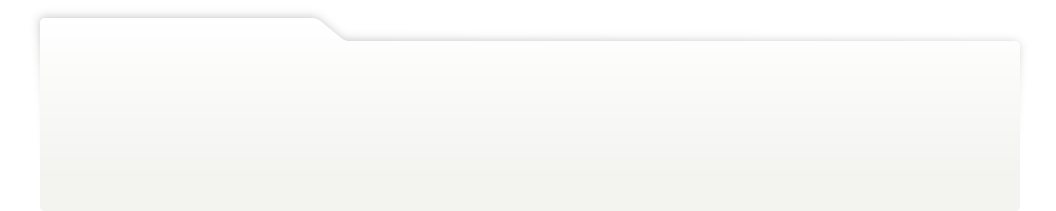
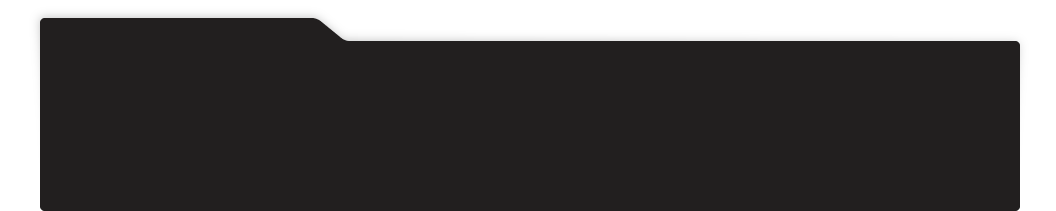
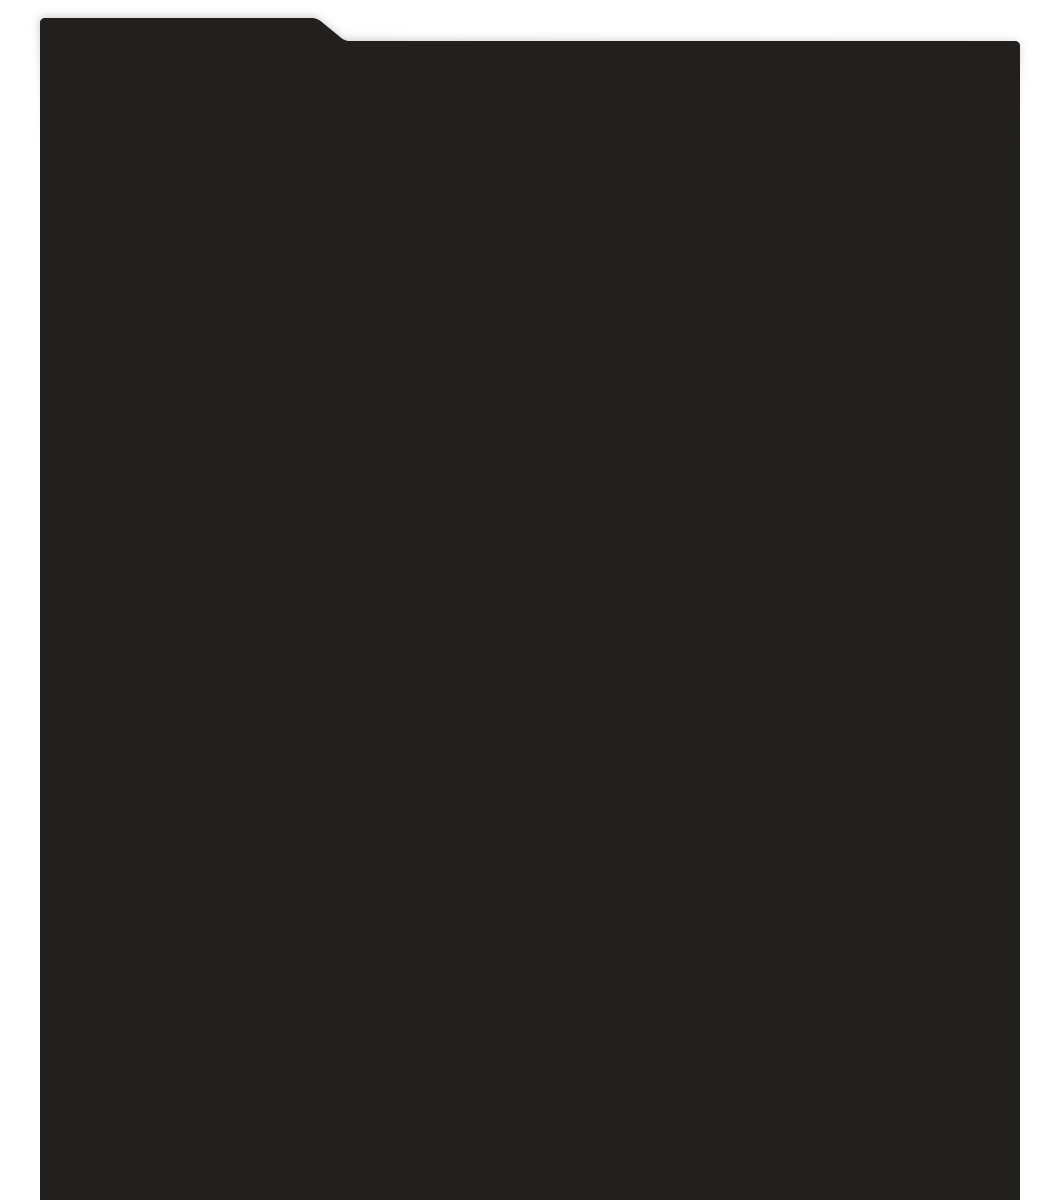
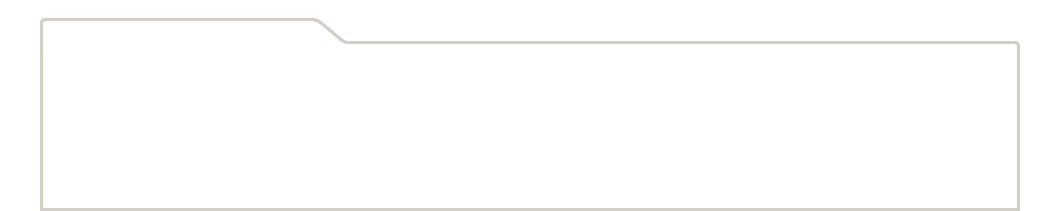
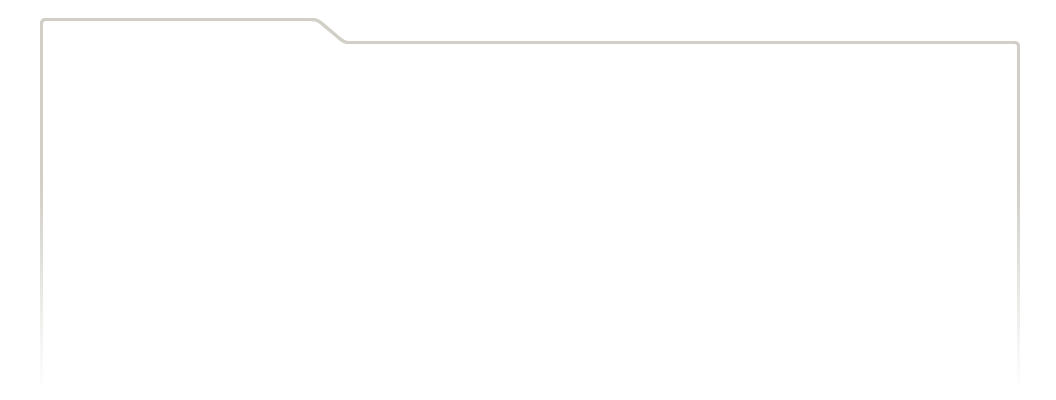
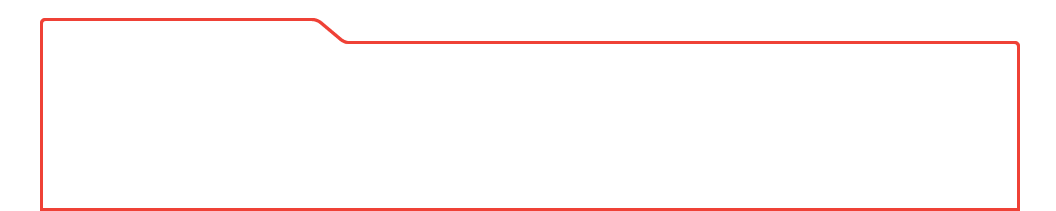
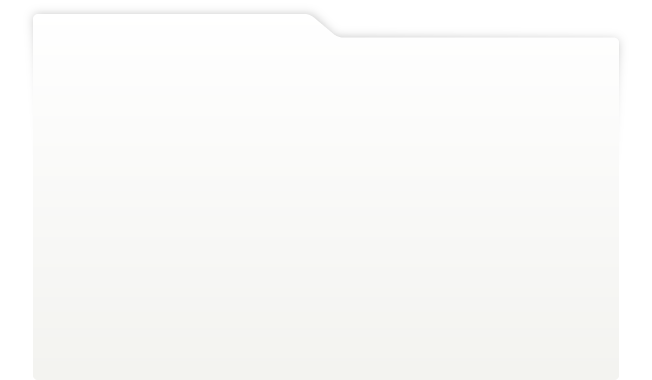
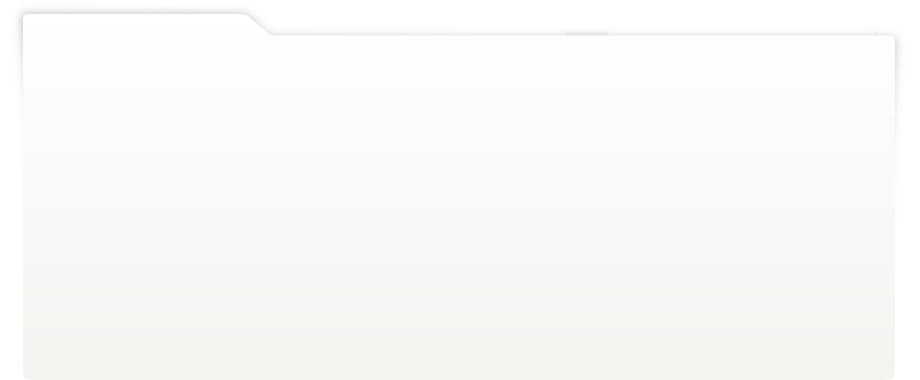
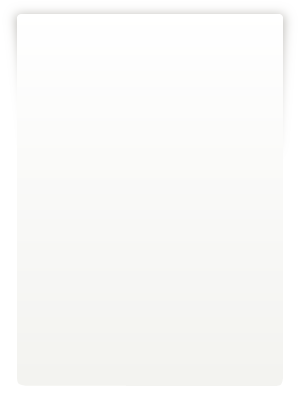
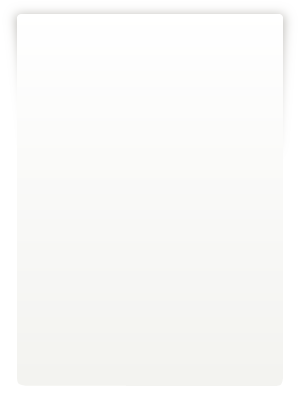
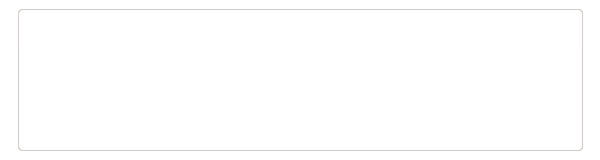
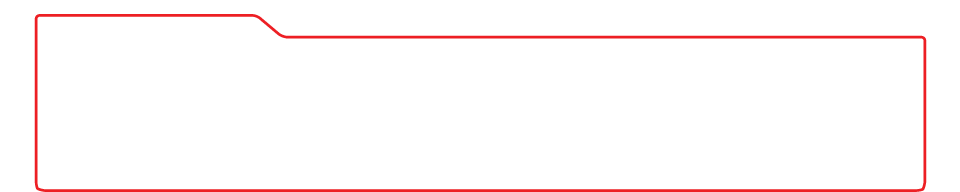
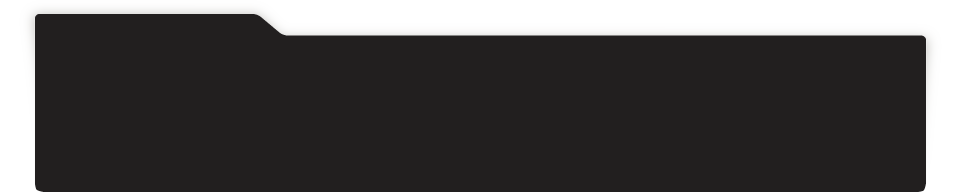
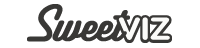
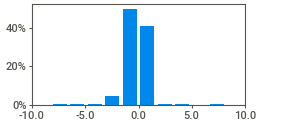
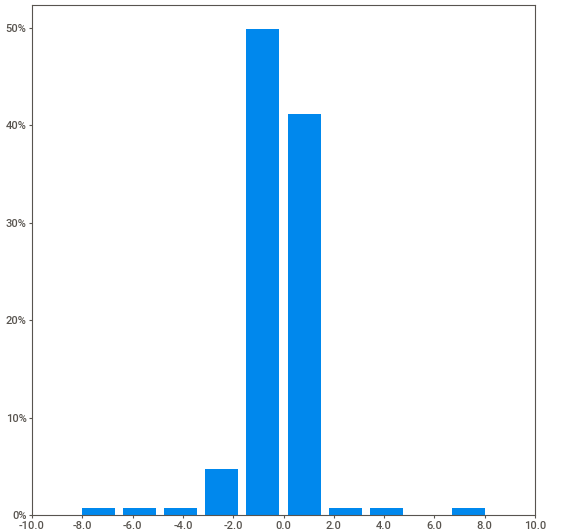
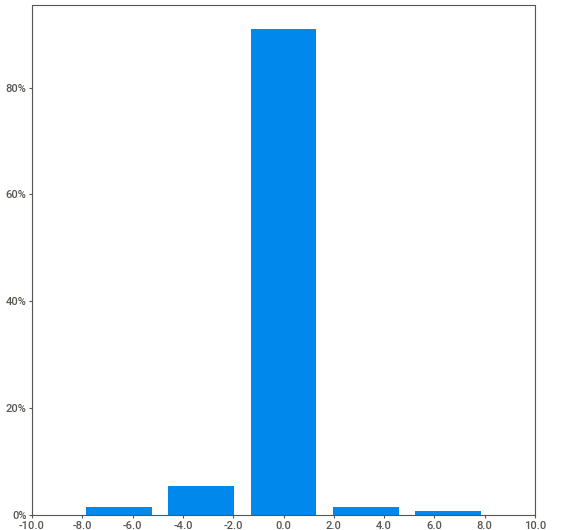
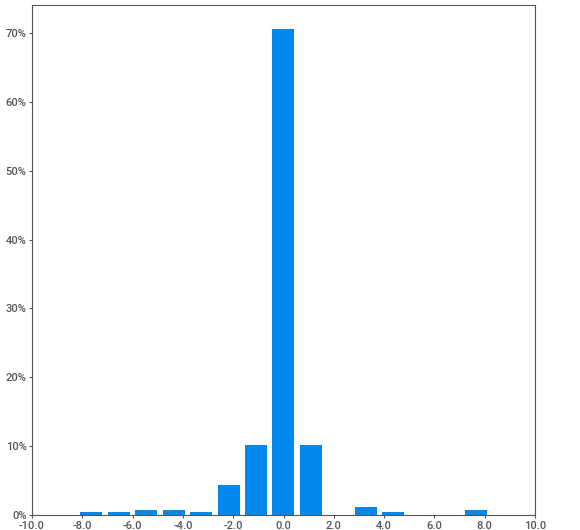
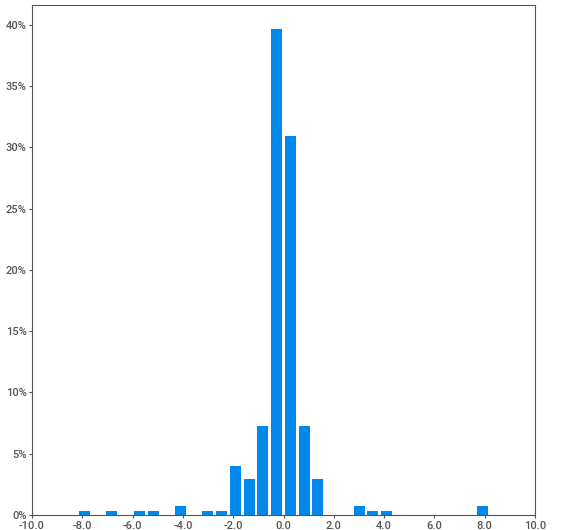
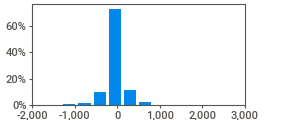
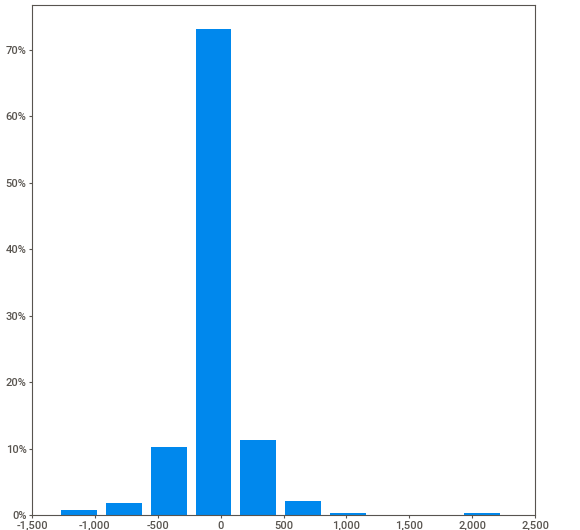
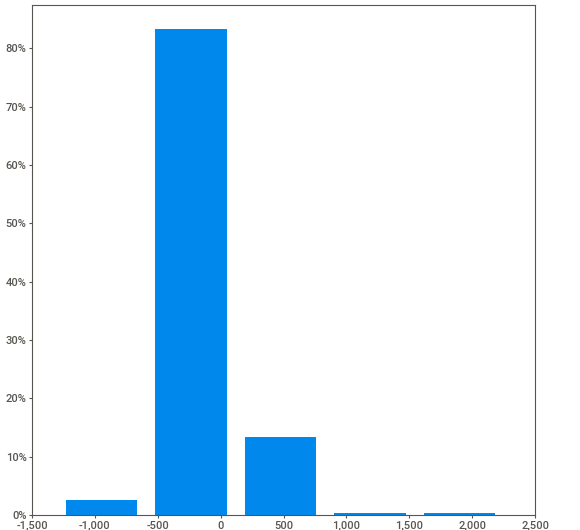
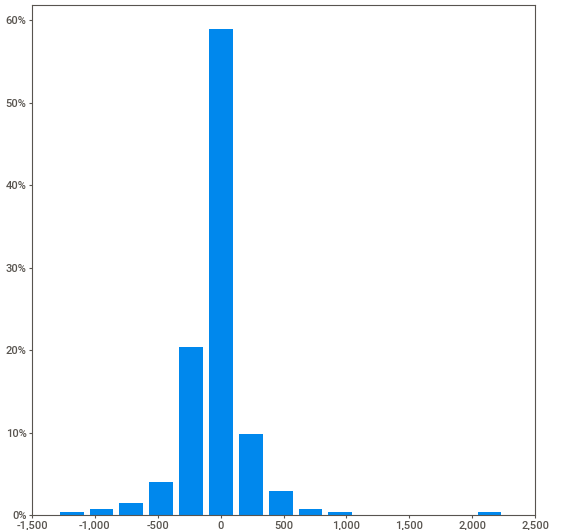
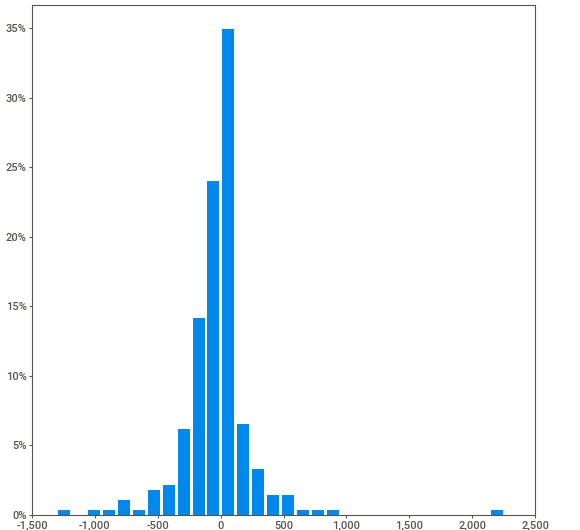
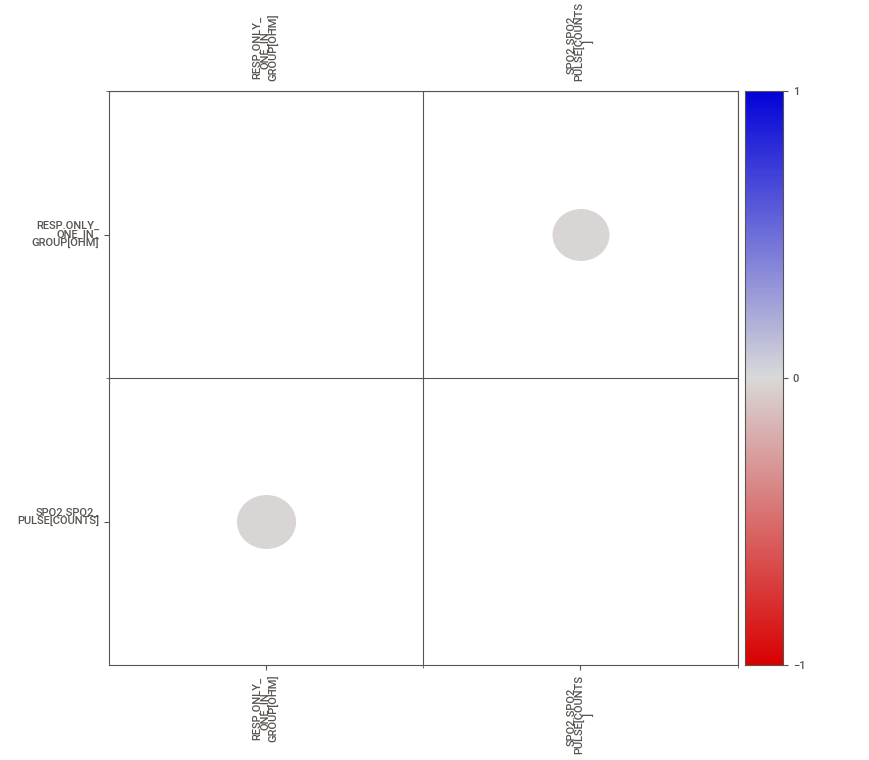
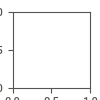

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



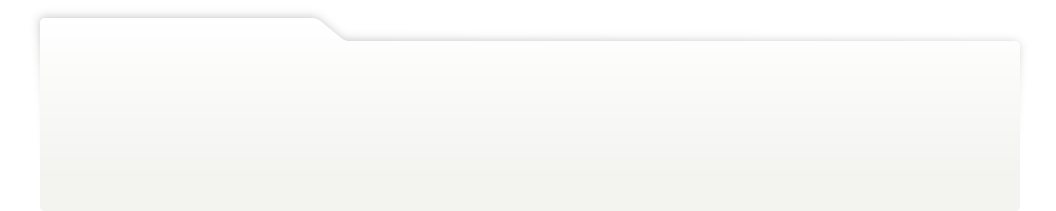
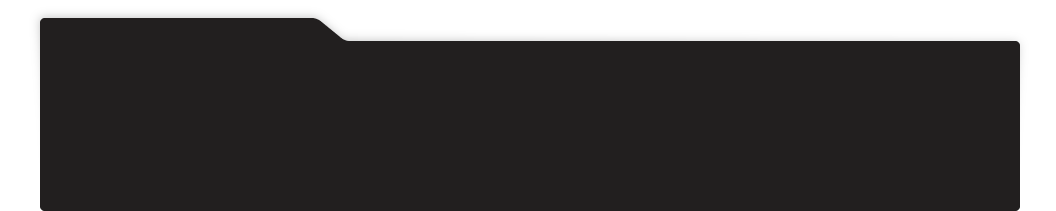
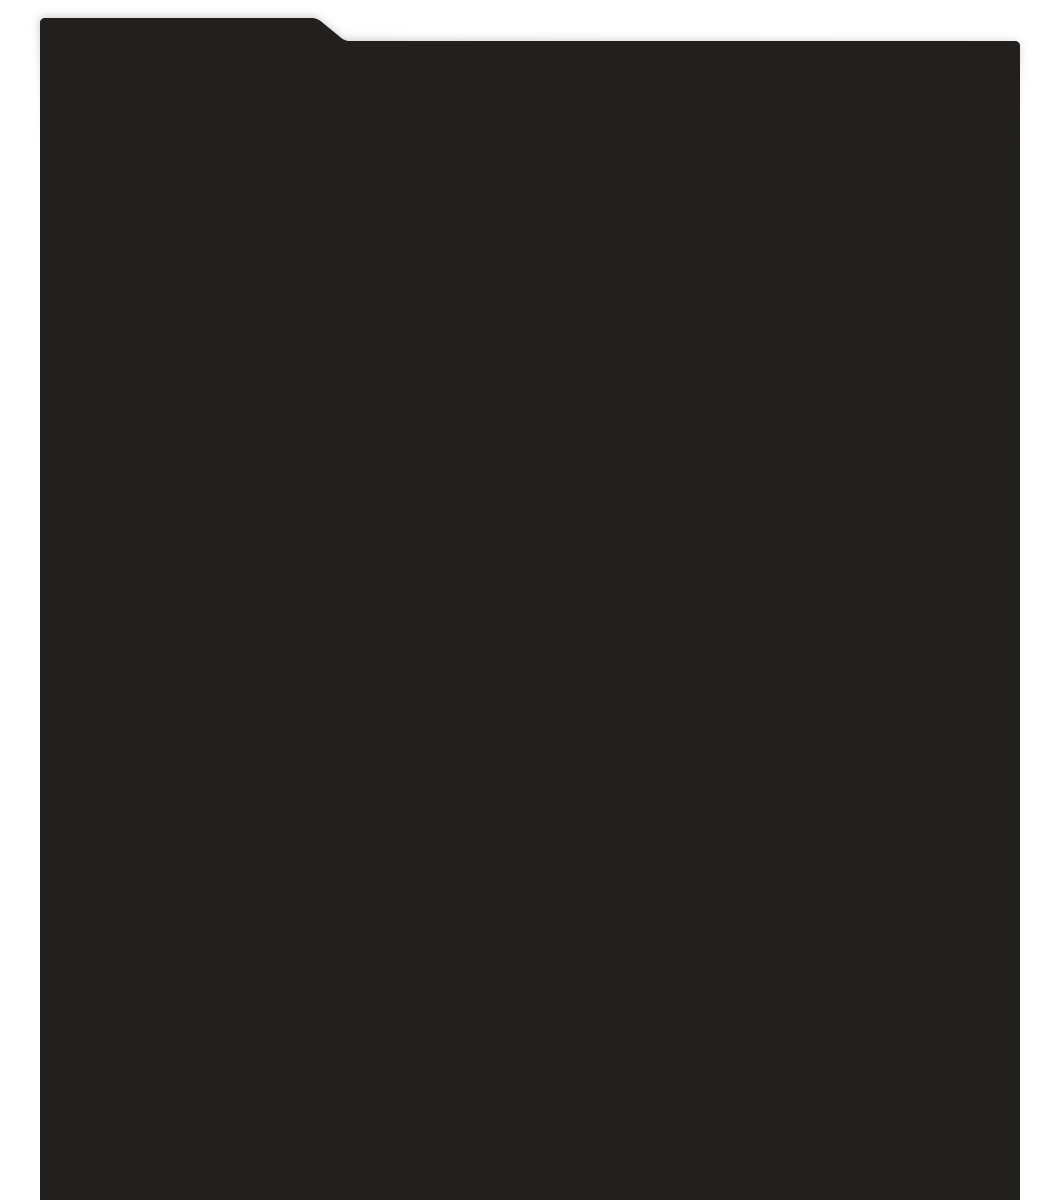
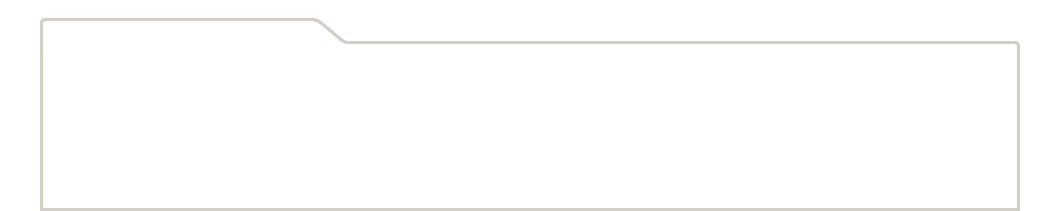
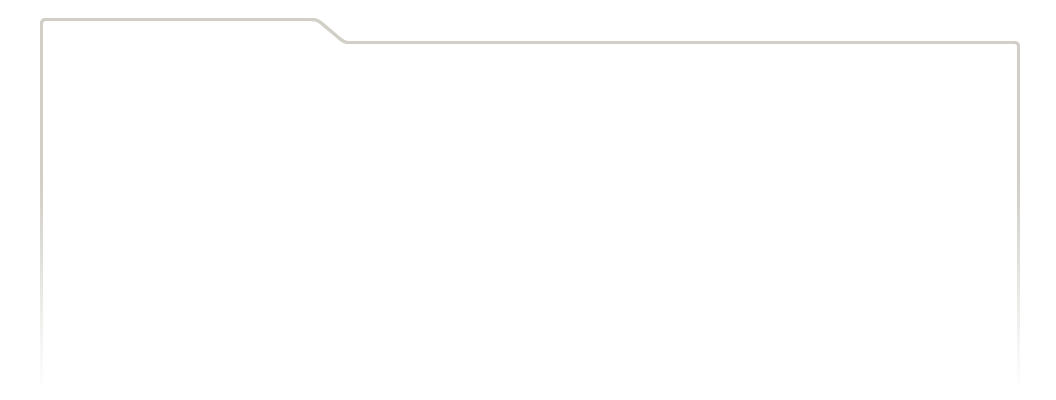
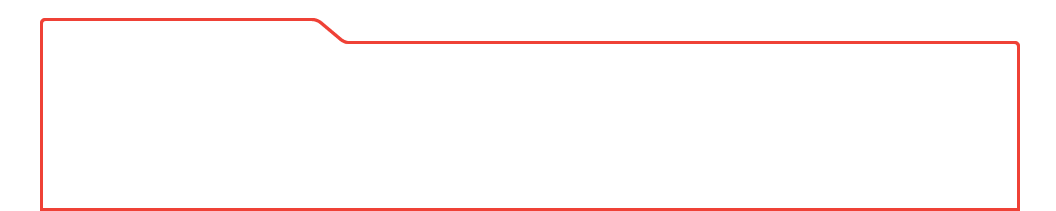
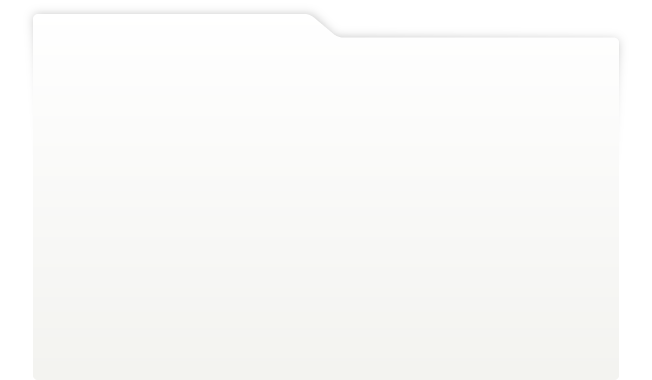
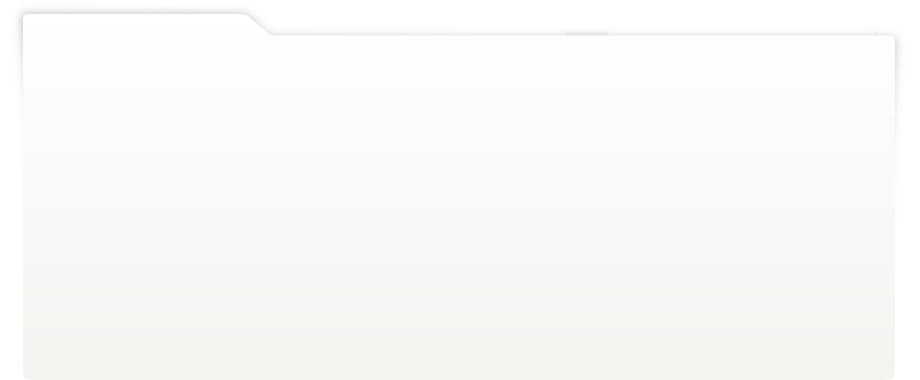
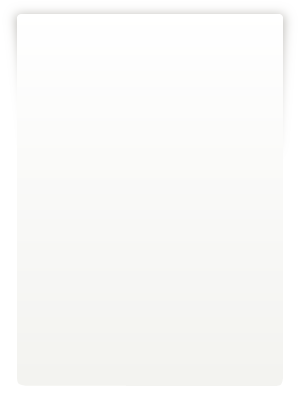
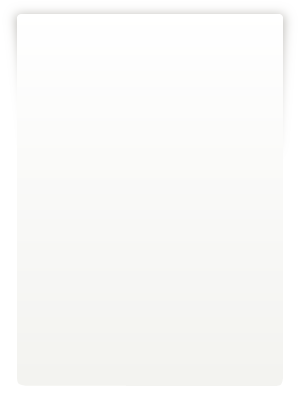
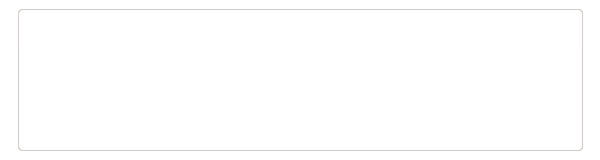
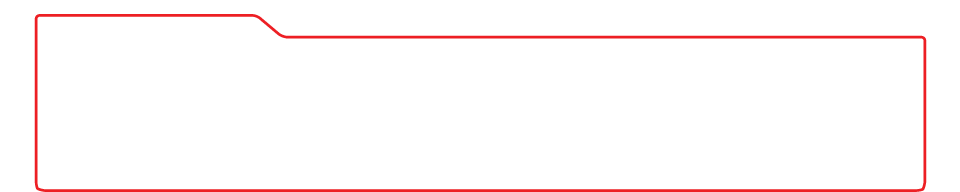
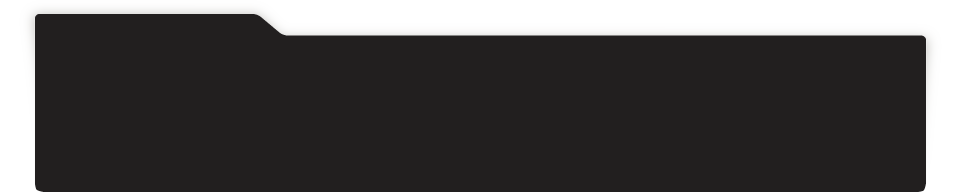
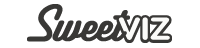
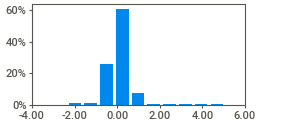
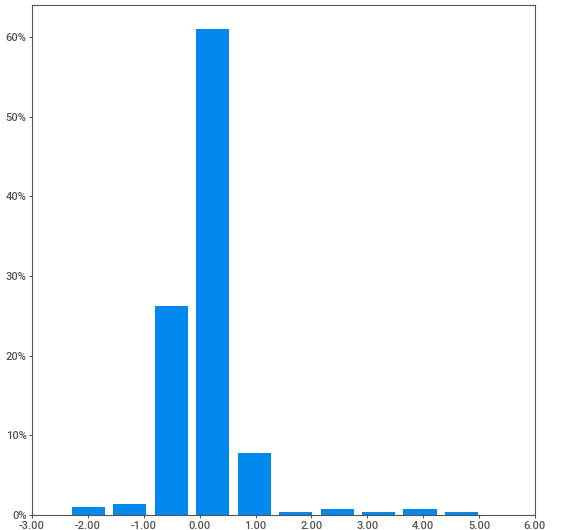
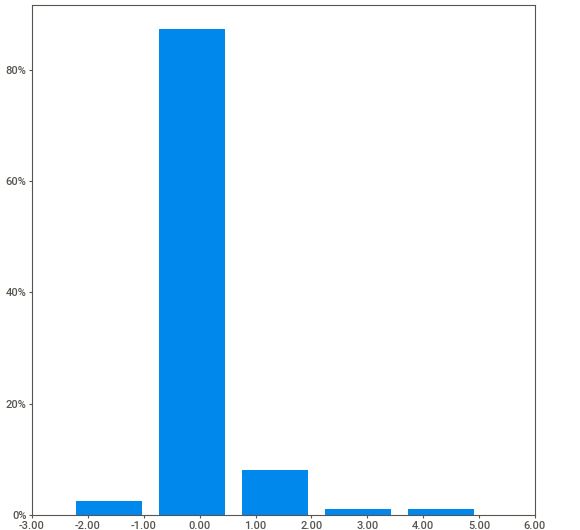
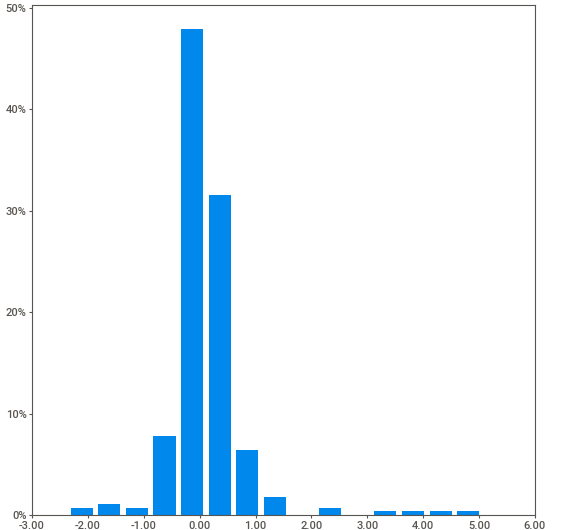
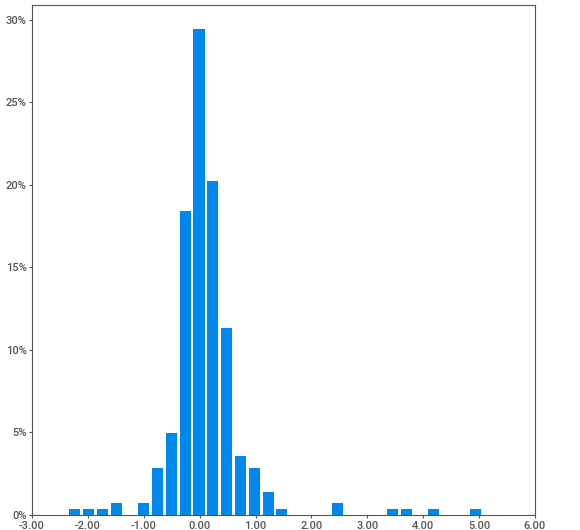
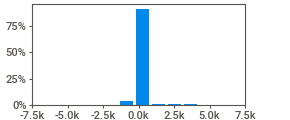
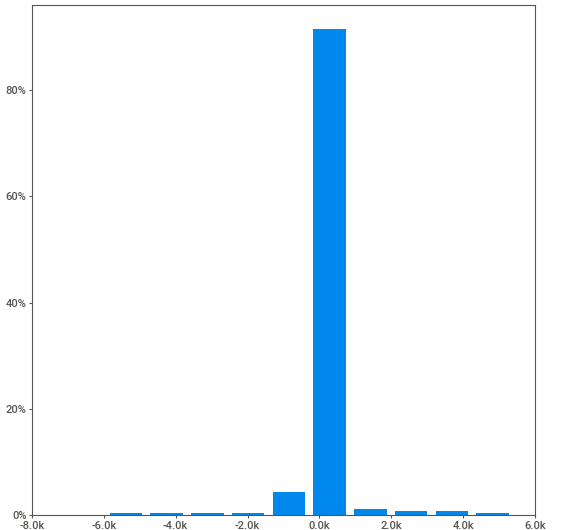
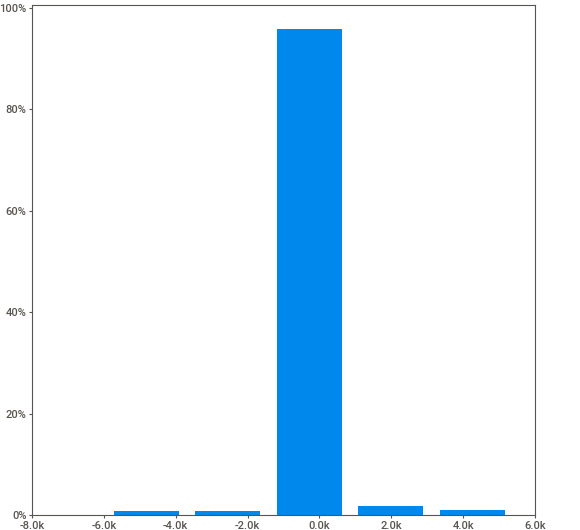
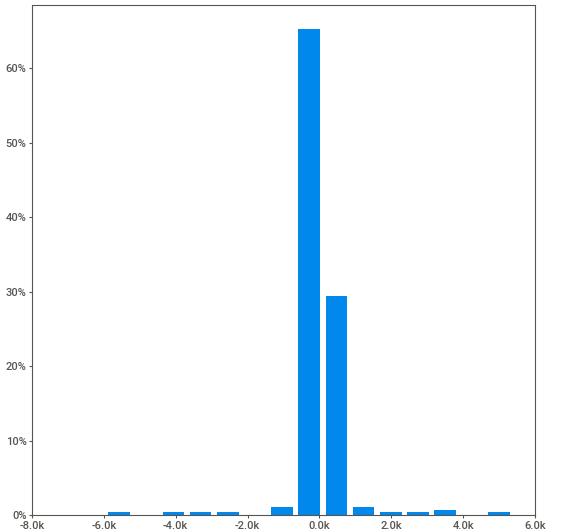
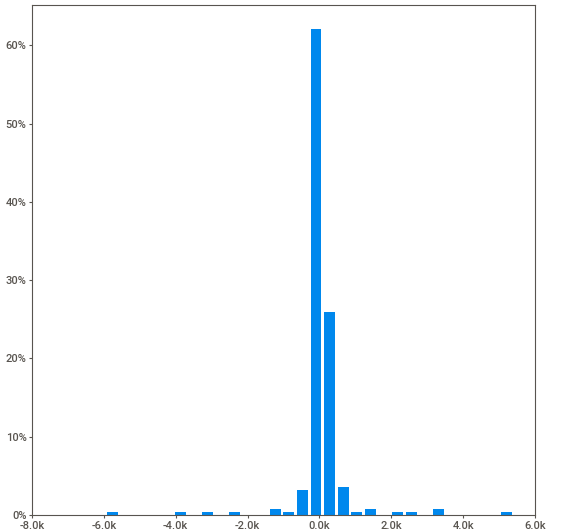
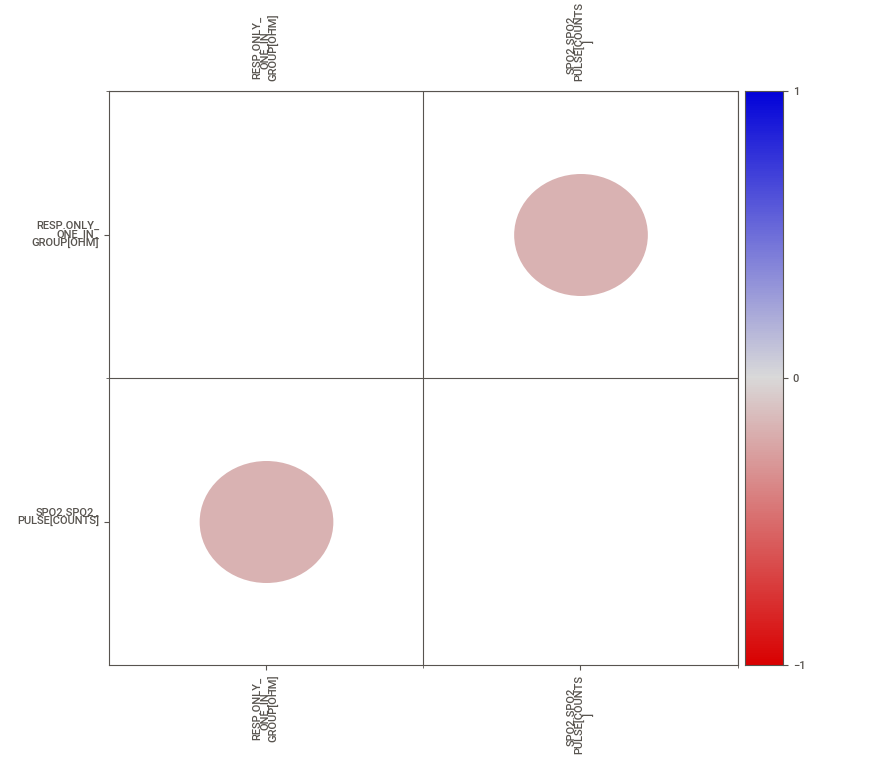
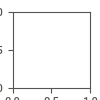

In [32]:
import sweetviz as sv
for i in range(len(data)):
    orig_data_report = sv.analyze(data[i], pairwise_analysis = 'on')
    orig_data_report.show_notebook()

# Data segmentation

import math
import numpy as np
np_data = FinalData.to_numpy()
labels = State.to_numpy()
labels.astype('int')
nb_timestamps, nb_sensors = np_data.shape
window_size = 100 # Size of the data segments, earlier there was the value of 60
timestamp_idx = 0 # Index along the timestamp dimension
segment_idx = 0 # Index for the segment dimension


nb_segments = int(math.floor(nb_timestamps/window_size))
print('Starting segmentation with a window size of %d resulting in %d segments ...' % (window_size,nb_segments))
data_to_save = np.zeros((nb_segments,window_size,nb_sensors),dtype=np.float32)
labels_to_save = np.zeros(nb_segments,dtype=int)

while segment_idx < nb_segments:
    data_to_save[segment_idx] = np_data[timestamp_idx:timestamp_idx+window_size,:]
    # Check the majority label ocurring in the considered window
    current_labels = labels[timestamp_idx:timestamp_idx+window_size]
    values, counts = np.unique(current_labels, return_counts=True)
    labels_to_save[segment_idx] = values[np.argmax(counts)]
    timestamp_idx += window_size
    segment_idx += 1

In [33]:
import math
import numpy as np

def segmentation(pd_data, shape):
    np_data = pd_data.to_numpy()
    nb_timestamps, nb_sensors = shape
    window_size = 100 # Size of the data segments, earlier there was the value of 60
    timestamp_idx = 0 # Index along the timestamp dimension
    segment_idx = 0 # Index for the segment dimension
    
    nb_segments = int(math.floor(nb_timestamps/window_size))
    print(f'Starting segmentation with a window size of {window_size} resulting in {nb_segments} segments.')
    data_to_save = np.zeros((nb_segments,window_size,nb_sensors),dtype=np.float32)

    while segment_idx < nb_segments:
        data_to_save[segment_idx] = np_data[timestamp_idx:timestamp_idx+window_size,:]
        timestamp_idx += window_size
        segment_idx += 1
    return data_to_save

To poniżej powinno być tablicą, a na razie nie jest - czyta na razie tylko wartość (chociaż nawet to nie), ale nigdzie ich nie zapisuje

In [34]:
position = []
for i in range(len(data)):
    shape = np.array(data[i]).shape
    print(shape)
    segmented = segmentation(data[i], shape)
    print(segmented)
    position.append(segmented)
    
    

(275, 2)
Starting segmentation with a window size of 100 resulting in 2 segments.
[[[-1.84399998e+00  9.37000000e+02]
  [-6.70000017e-02  9.90000000e+01]
  [ 3.16000015e-01 -3.50000000e+01]
  [ 2.10999995e-01 -1.40000000e+01]
  [ 1.84499994e-01 -6.76666641e+01]
  [ 1.58000007e-01 -1.21333336e+02]
  [ 1.31500006e-01 -1.75000000e+02]
  [ 1.04999997e-01  1.10000000e+02]
  [ 1.69000000e-01 -9.20000000e+01]
  [ 1.34200007e-01 -1.47800003e+02]
  [ 9.93999988e-02 -2.03600006e+02]
  [ 6.45999983e-02 -2.59399994e+02]
  [ 2.97999997e-02 -3.15200012e+02]
  [-4.99999989e-03 -3.71000000e+02]
  [-5.95000014e-02 -2.61500000e+02]
  [-1.14000000e-01 -1.52000000e+02]
  [-8.90000015e-02 -1.05000000e+01]
  [-6.40000030e-02  1.31000000e+02]
  [-5.70000000e-02  4.00000000e+00]
  [-5.00000007e-02 -1.23000000e+02]
  [-4.30000015e-02 -2.50000000e+02]
  [-3.59999985e-02 -3.77000000e+02]
  [-2.89999992e-02 -1.02400000e+03]
  [-2.19999999e-02 -1.60000000e+01]
  [-1.01999998e-01 -1.30000000e+01]
  [-1.81999996e-01

In [36]:
#print(position[0][250][99])

In [37]:
for i in range(len(position)):
    print(position[i].shape)

(2, 100, 2)
(2, 100, 2)


In [38]:
for i in range(len(position)):
    position[i]

In [39]:
position[1]

array([[[-1.55000001e-01, -4.50000000e+01],
        [ 1.94000006e-01, -4.80000000e+01],
        [ 5.42999983e-01, -5.10000000e+01],
        [ 3.87250006e-01,  1.34000000e+02],
        [ 2.31500000e-01,  2.15300000e+03],
        [ 7.57500008e-02, -1.37000000e+02],
        [-7.99999982e-02, -6.70000000e+01],
        [-1.60999998e-01, -7.40000000e+01],
        [-1.94499999e-01, -9.55000000e+01],
        [-2.28000000e-01, -1.17000000e+02],
        [ 1.35000005e-01, -8.00000000e+00],
        [ 1.09999999e-01,  2.10000000e+02],
        [ 8.50000009e-02,  2.60000000e+01],
        [ 5.99999987e-02,  2.50000000e+01],
        [ 2.89999992e-01,  6.60000000e+01],
        [ 2.04799995e-01,  3.25000000e+01],
        [ 1.19599998e-01, -1.00000000e+00],
        [ 3.44000012e-02,  7.30000000e+01],
        [-5.07999994e-02, -2.20000000e+01],
        [-1.36000007e-01,  3.92000000e+02],
        [-3.90000008e-02, -4.90000000e+01],
        [-1.06600001e-01, -1.79000000e+02],
        [-1.74199998e-01, -3.090

In [40]:
for i in range(len(position)):
    chunk_size = position[i].shape[1]
    print(chunk_size)

100
100


In [41]:
#old
'''
F = 200 # Data frequency of 200HZ
labels = []
def extract_features(data_to_save, chunk_size):
    num_chunks = data_to_save.shape[0]//chunk_size
    num_features = 6
    num_sensors = data_to_save.shape[2]
    features = np.zeros((num_chunks, num_features*num_sensors))
    for i in range(num_chunks):
        chunk = data_to_save[i*chunk_size:(i+1)*chunk_size, :, :]
        mean = np.mean(chunk, axis=(0, 1))
        median = np.median(chunk, axis=(0, 1))
        std = np.std(chunk, axis=(0, 1))
        min_val = np.min(chunk, axis=(0, 1))
        max_val = np.max(chunk, axis=(0, 1))
        #arg_max = np.argmax(chunk, axis=(0, 1))
        sum_val = np.sum(chunk, axis=(0, 1))/F
        features[i,:] = np.hstack([mean, median, std, min_val, max_val, sum_val]).reshape(1, num_features*num_sensors)
        labels[i] = labels_to_save[i]
    #features = features.reshape(num_chunks, num_features, num_sensors)
    return features
'''

'\nF = 200 # Data frequency of 200HZ\nlabels = []\ndef extract_features(data_to_save, chunk_size):\n    num_chunks = data_to_save.shape[0]//chunk_size\n    num_features = 6\n    num_sensors = data_to_save.shape[2]\n    features = np.zeros((num_chunks, num_features*num_sensors))\n    for i in range(num_chunks):\n        chunk = data_to_save[i*chunk_size:(i+1)*chunk_size, :, :]\n        mean = np.mean(chunk, axis=(0, 1))\n        median = np.median(chunk, axis=(0, 1))\n        std = np.std(chunk, axis=(0, 1))\n        min_val = np.min(chunk, axis=(0, 1))\n        max_val = np.max(chunk, axis=(0, 1))\n        #arg_max = np.argmax(chunk, axis=(0, 1))\n        sum_val = np.sum(chunk, axis=(0, 1))/F\n        features[i,:] = np.hstack([mean, median, std, min_val, max_val, sum_val]).reshape(1, num_features*num_sensors)\n        labels[i] = labels_to_save[i]\n    #features = features.reshape(num_chunks, num_features, num_sensors)\n    return features\n'

# Saving array for further processing

In [42]:
data_to_save_copy = position.copy()

In [43]:
#from numba import cuda
import scipy
from scipy.stats import kurtosis, skew

# Feature extraction

In [44]:


def extract_features2(extracted_data, chunk_size = position[0].shape[1]):
    freq = 100 # Data frequency of 200HZ
    num_chunks = extracted_data.shape[0]//chunk_size
    #global num_features
    #num_features = 8
    num_sensors = extracted_data.shape[2]
    features = np.zeros((num_chunks, num_features*num_sensors))
    
    
    positive = 0
    negative = 0
    
    
    for i in range(num_chunks):
        chunk = extracted_data[i*chunk_size:(i+1)*chunk_size, :, :]
        mean = np.mean(chunk, axis=(0, 1))
        median = np.median(chunk, axis=(0, 1))
        std = np.std(chunk, axis=(0, 1))
        min_val = np.min(chunk, axis=(0, 1))
        max_val = np.max(chunk, axis=(0, 1))
        sum_val = np.sum(chunk, axis=(0, 1))/freq
        fft_sum_list = []
                    # Perform FFT on the chunk of data
        #argmax_list = []
        
        
        
        fft_argmax_list = []
        fft_sum_list_1 = []
        row_fft = [np.array([]) for _ in range(num_sensors)]
        '''

    
        fft_vals_1 = np.fft.fft(chunk[i,])
        print(fft_vals_1)
        fft_sum_1 = np.sum(np.abs(fft_vals_1))/freq
                #print(fft_sum)
                #print('The value of fft_sum: ', fft_sum)
    
            #print(fft_vals_1[:,0])    
            #print(fft_vals_1[1,:])
    
            #print(fft_vals_1[i], end = '\n')
            #print('\n')
        fft_sum_list_1.append(fft_sum_1)
        argmax_1 = np.argmax(fft_vals_1[i])
            #print(argmax_1)
            #print(fft_vals_1[argmax_1, i], end = '\n')
                #print(fft_vals[argmax, j], end = '\n')
            #print('\n')
        
        #row_fft[0] = np.append(row_fft[0], fft_vals_1[:,0])
        #row_fft[1] = np.append(row_fft[1], fft_vals_1[:,1])
        '''
        ###################################################################
        for j in range(num_sensors):
            kurtosis = scipy.stats.kurtosis(chunk[j,])
            skew = scipy.stats.skew(chunk[j,])
            
            
            fft_vals = np.fft.fft(chunk[j,])
            #print(fft_vals)
            fft_sum = np.sum(np.abs(fft_vals))/freq
            #print(fft_sum)
            #print('The value of fft_sum: ', fft_sum)
    
        
        #print(fft_vals_1[i], end = '\n')
        #print('\n')
            fft_sum_list.append(fft_sum)
            #argmax_1 = np.argmax(fft_vals_1[j])
            
        #print(fft_vals[:,0])    
        #print(fft_vals[1,:])
        positive_count = np.count_nonzero(fft_vals > 0)
        negative_count = np.count_nonzero(fft_vals < 0)
        positive += positive_count
        negative += negative_count
        #print("Number of positive values:", positive_count)
        #print("Number of negative values:", negative_count)
        
        '''
        fft_vals = np.fft.fft(chunk[j,])
        fft_sum = np.sum(np.abs(fft_vals))/freq
        #print(fft_sum)
        #print('The value of fft_sum: ', fft_sum)
        print(fft_vals, end = '\n')
        print('\n')
        fft_sum_list.append(fft_sum)
        argmax = np.argmax(fft_vals)
        print(argmax)
        print(fft_vals[argmax], end = '\n')
        #print(fft_vals[argmax, j], end = '\n')
        print('\n')
        #if (fft_vals[argmax] > 0):
        #    fft_argmax_list.append(fft_vals[argmax])
        '''     
        #print(row_fft[0])
            #print(row_fft[1])       
            
            #val_for_argmax = fft_vals[argmax]
                        #fft_argmax_list.append(argmax_test)
                        #print(argmax_test)
                        #argmax = np.argmax(chunk[j,])
                        #argmax_list.append(argmax)
        #print("fft_argmax_list", fft_argmax_list)
        #print("Argmax list", argmax_list)
        fft_sum_list = np.array(fft_sum_list)
        #####print(fft_sum_list)    
        #print(fft_argmax_list)
        features[i,:] = np.concatenate([mean, median, std, min_val, max_val, sum_val, kurtosis, skew, fft_sum_list])
        global feature_names
        feature_names = ['mean', 'mean_2', 'median', 'median_2', 'std', 'std_2', 'min_val', 'min_val_2',\
            'max_val', 'max_val_2', 'sum_val', 'sum_val_2', 'kurtosis', 'kurtosis_2', 'skew', 'skew_2', 'fft_sum', 'fft_sum_2']
    print(f'total positive values for position {positive}')
    print(f'total negative values for position {negative}')        
    return features

####

#Uwaga obie wartości fft_sum dla obydwu czujników dopisywane są na sam koniec tablicy, jedna po drugiej!!


####

# Number of samples
#N = new_array.shape[0]

# Compute the frequencies in Hz for the power spectrum
#frequencies = np.fft.fftfreq(N, 1/sampling_rate)

In [45]:


def extract_features3(extracted_data, chunk_size = position[0].shape[1]):
    freq = 100 # Data frequency of 200HZ
    num_chunks = extracted_data.shape[0]//chunk_size

    num_sensors = extracted_data.shape[2]
    features = np.zeros((num_chunks, num_features*num_sensors))
    
    
    positive = 0
    negative = 0
    
    
    for i in range(num_chunks):
        chunk = extracted_data[i*chunk_size:(i+1)*chunk_size, :, :]
 
        fft_argmax_list = []
        fft_sum_list_1 = []
        row_fft = [np.array([]) for _ in range(num_sensors)]

        for j in range(num_sensors):
            kurtosis = scipy.stats.kurtosis(chunk[j,])
            skew = scipy.stats.skew(chunk[j,])
            
            
            fft_vals = np.fft.fft(chunk[j,])

            fft_sum = np.sum(np.abs(fft_vals))/freq

            fft_sum_list.append(fft_sum)

        #print(fft_vals[:,0])    
        #print(fft_vals[1,:])
        positive_count = np.count_nonzero(fft_vals > 0)
        negative_count = np.count_nonzero(fft_vals < 0)
        positive += positive_count
        negative += negative_count

        #print("Number of negative values:", negative_count)
       
        fft_sum_list = np.array(fft_sum_list)

        features[i,:] = np.concatenate([kurtosis, skew, fft_sum_list])
        global feature_names
        feature_names = ['mean', 'mean_2', 'median', 'median_2', 'std', 'std_2', 'min_val', 'min_val_2',\
            'max_val', 'max_val_2', 'sum_val', 'sum_val_2', 'kurtosis', 'kurtosis_2', 'skew', 'skew_2', 'fft_sum', 'fft_sum_2']
    print(f'total positive values for position {positive}')
    print(f'total negative values for position {negative}')        
    return features

####

#Uwaga obie wartości fft_sum dla obydwu czujników dopisywane są na sam koniec tablicy, jedna po drugiej!!


####

# Number of samples
#N = new_array.shape[0]

# Compute the frequencies in Hz for the power spectrum
#frequencies = np.fft.fftfreq(N, 1/sampling_rate)

In [67]:
import numpy as np
import scipy
from scipy import stats
from scipy.integrate import trapz
from scipy.fft import fft

global num_features
num_features = 10
def feature_extraction(data):
        freq = 100
        mean_array = np.empty((len(data),2), dtype = float)
        median_array = np.empty((len(data),2), dtype = float)
        std_array = np.empty((len(data),2), dtype = float)
        min_val_array = np.empty((len(data),2), dtype = float)
        max_val_array = np.empty((len(data),2), dtype = float)
        sum_val_array = np.empty((len(data),2), dtype = float)
        kurtosis_array = np.empty((len(data),2), dtype = float)
        skewness_array = np.empty((len(data),2), dtype = float)
        for i in range(len(data)):
                mean_array[i] = np.mean(data[i], axis=0)
                median_array[i] = np.median(data[i], axis=0)
                std_array[i] = np.std(data[i], axis=0)
                min_val_array[i] = np.min(data[i], axis=0)
                max_val_array[i] = np.max(data[i], axis=0)
                sum_val_array[i] = np.sum(data[i], axis=0)/freq
                
                kurtosis_array[i] = scipy.stats.kurtosis(data[i], axis=0)
                skewness_array[i] = scipy.stats.skew(data[i], axis=0)


        fft_sums = np.zeros((len(data),2), dtype = float)

        fft_freqs = np.zeros((len(data),2), dtype = float)

        #Flattening the array to shape (a*b, c), where c is the number of sensors
        flat_arr = data.reshape(len(data)*len(data[1]), len(data[0][1]))

        
        k = 0
        for k in range(len(data)):
                
                chunk = flat_arr[k * len(data[1]) : (k + 1) * len(data[1]), ]
                
                sensor_1 = chunk[:,0]
                sensor_2 = chunk[:,1]
                
                
                sp1 = np.fft.fft(np.sin(sensor_1))
                ps1 = np.abs(sp1)**2
                sp2 = np.fft.fft(np.sin(sensor_2))
                ps2 = np.abs(sp2)**2
                
                
                # Define the frequency range of interest
                sensor_1_freq = np.fft.fftfreq(len(chunk), 1/freq)
                
                idx1 = np.logical_and(sensor_1_freq >= 0, sensor_1_freq <= freq)

                # Integrate the power spectrum over the frequency range of interest
                area1 = trapz(ps1[idx1], sensor_1_freq[idx1])


                # Define the frequency range of interest
                sensor_2_freq = np.fft.fftfreq(len(chunk), 1/freq)
                
                idx2 = np.logical_and(sensor_2_freq >= 0, sensor_2_freq <= freq)

                # Integrate the power spectrum over the frequency range of interest
                area2 = trapz(ps2[idx1], sensor_2_freq[idx1])


                fft_sums[k] = [area1, area2]
                
                
                argmax_ind_1 = np.arange(len(sp1))
                argmax_list_1 = argmax_ind_1[np.argsort(-np.abs(sp1))]
                
                max_power_frequency_1 = argmax_list_1[0] * (freq / len(chunk))
                
                
                argmax_ind_2 = np.arange(len(sp2))
                argmax_list_2 = argmax_ind_2[np.argsort(-np.abs(sp2))]
                
                
                array_len_1 = len(argmax_list_1)
                
                for ind_1 in range(array_len_1):
                        
                        if (argmax_list_1[ind_1] * (freq / len(chunk)) <= 1):
                                
                                continue
                        
                        elif (argmax_list_1[ind_1] * (freq / len(chunk)) > 1):
                                max_power_frequency_1 = argmax_list_1[ind_1] * (freq / len(chunk))

                                break
                        
                array_len_2 = len(argmax_list_2)

                for ind_2 in range(array_len_2):
                        
                        if (argmax_list_2[ind_2] * (freq / len(chunk)) <= 1):
                                
                                continue
                        
                        elif (argmax_list_2[ind_2] * (freq / len(chunk)) > 1):
                                max_power_frequency_2 = argmax_list_2[ind_2] * (freq / len(chunk))
        
                                break
           
        
        
                fft_freqs[k] = [max_power_frequency_1, max_power_frequency_2]


        global feature_names
        feature_names = ['mean', 'mean_2', 'median', 'median_2', 'std', 'std_2', 'min_val', 'min_val_2',\
                'max_val', 'max_val_2', 'sum_val', 'sum_val_2', 'kurtosis', 'kurtosis_2', 'skew', 'skew_2', 'fft_sum', 'fft_sum_2']
        
        features = np.zeros((len(data), num_features))        

        features = np.concatenate((mean_array, median_array, std_array, min_val_array, max_val_array, sum_val_array, kurtosis_array, skewness_array, fft_sums, fft_freqs), axis = 1)
        return features    

In [68]:
#extract_features(position[0])


for i in range(len(position)):
        print('Position %d' % i)
        feature_extraction(position[i])
        x = feature_extraction(position[i])
        print(x)
        print(x.shape)

Position 0
[[-2.92290002e-01 -2.39150009e+01 -8.24999996e-03 -8.16666603e+00
   1.16970527e+00  2.58042664e+02 -6.57299995e+00 -1.02400000e+03
   1.30599999e+00  9.37000000e+02 -2.92290002e-01 -2.39150009e+01
   1.11698694e+01  4.23928356e+00 -3.08294845e+00 -2.43405297e-01
   9.86435397e+02  2.25587848e+03  2.00000000e+00  5.40000000e+01]
 [ 6.74497243e-03 -6.18416634e+01 -8.37000012e-02 -1.85000000e+01
   1.18486011e+00  2.73031250e+02 -2.14199996e+00 -1.30300000e+03
   8.19099998e+00  7.84000000e+02  6.74497243e-03 -6.18416634e+01
   2.23986702e+01  4.49867630e+00  3.73386931e+00 -9.10498440e-01
   9.55191856e+02  2.33303357e+03  9.90000000e+01  3.60000000e+01]]
(2, 20)
Position 1
[[ 8.80100057e-02  1.96145004e+02 -3.50000001e-02  1.81666660e+01
   7.23595738e-01  7.57985046e+02 -2.08299994e+00 -5.38000000e+02
   4.27199984e+00  5.38600000e+03  8.80100057e-02  1.96145004e+02
   1.45560818e+01  2.41306133e+01  2.93653393e+00  4.57980680e+00
   6.37898545e+02  2.22232532e+03  2.000000

def extract_features(data_to_save, chunk_size):
    num_chunks = data_to_save.shape[0]//chunk_size
    num_features = 4
    num_sensors = data_to_save.shape[2]
    features = np.zeros((num_chunks, num_features*num_sensors))
    for i in range(num_chunks):
        chunk = data_to_save[i*chunk_size:(i+1)*chunk_size, :, :]
        mean = np.mean(chunk, axis=(0, 1))
        median = np.median(chunk, axis=(0, 1))
        std = np.std(chunk, axis=(0, 1))
        min_val = np.min(chunk, axis=(0, 1))
        #arg_max = np.argmax(chunk, axis=(0, 1))
        features[i,:] = np.hstack([mean, median, std, min_val]).flatten()
    features = features.reshape(num_chunks, num_features, num_sensors)
    return features


In [49]:
def labeling():
    extracted_features = []
    for i in range(len(position)):
        extracted_features.append(feature_extraction(position[i]))
        #print(extracted_features)
    
    position_0 = feature_extraction(position[0])
    position_1 = feature_extraction(position[1])
    
    labels_0 = np.zeros(position_0.shape[0])
    labels_1 = np.ones(position_1.shape[0])
    
    complete_feature_dataset = np.concatenate((position_0,position_1))
    complete_label_dataset = np.concatenate((labels_0, labels_1))
    
    return complete_feature_dataset, complete_label_dataset

In [ ]:
#len(extracted_features)

In [ ]:
#position_0 = extract_features(position[0])
#position_1 = extract_features(position[1])

In [ ]:
#position_0.size
#position_0.shape

In [ ]:
#labels_0 = np.zeros(position_0.shape[0])
#labels_1 = np.ones(position_1.shape[0])

In [ ]:
#complete_feature_dataset = np.concatenate((position_0,position_1))

In [ ]:
#complete_label_dataset = np.concatenate((labels_0, labels_1))

In [ ]:
#complete_feature_dataset.shape

In [ ]:
#complete_label_dataset.shape

In [ ]:
#complete_label_dataset

#labels = np.squeeze(labels)

#%debug

In [ ]:
#new_array = new_array.flatten()

In [ ]:
#new_array

In [ ]:
#set(labels_to_save)

In [ ]:
#labels_to_save

###Creating an additional table called Saved_data for further actions

In [ ]:
#Saved_data = complete_feature_dataset

In [ ]:
#Saved_data.shape

In [ ]:
#data_to_save = np.array(data_to_save) # this is the 3D array
#data_to_save = data_to_save.reshape(data_to_save.shape[0], -1) # reshape to 2D array

## Data shuffling

In [ ]:
#labels_to_save = labels
#labels_to_save.shape

In [50]:
from sklearn.preprocessing import LabelEncoder
def data_shuffling():
    dataset = labeling()
    shuffler = np.random.permutation(len(dataset[0]))
    X = dataset[0][shuffler]
    y = dataset[1][shuffler]

    return X,y
#le = LabelEncoder()
#y = le.fit_transform(y)

In [ ]:
#data_shuffling()

# Recursive feature elimination

In [51]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

In [ ]:
'''
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, 6)
fit = rfe.fit(X, y)


# summarize the selection of the attributes
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
'''

In [ ]:
'''
model = RandomForestClassifier()
rfe = RFE(model, 6)
fit = rfe.fit(X, y)


# summarize the selection of the attributes
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
'''

In [ ]:
'''
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.datasets import load_digits

# create the RFE model and select 6 attributes
svm = SVC(kernel="linear", C=1)
rfe = RFE(svm, 6)
fit = rfe.fit(X, y)

# summarize the selection of the attributes
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
'''

In [ ]:
'''
#models = [LogisticRegression(solver='liblinear', max_iter=1000), SVC(kernel='linear'), RandomForestClassifier()]
models = [LogisticRegression(solver='liblinear', max_iter=1000), RandomForestClassifier()]

for model in models:
    rfe = RFE(model, n_features_to_select=6)
    cv_scores = cross_val_score(rfe, X, y, cv=5)
    print("Model:", model.__class__.__name__)
    print("Selected Features:", rfe.fit(X, y).support_)
    print("CV Scores:", cv_scores)
    print("Mean CV Score:", cv_scores.mean())
    
'''

In [52]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_absolute_error

In [59]:
def feature_elimination(n = i):
    # Create the Random Forest classifier
    rf = RandomForestClassifier()

    # Perform feature selection using RFE
    rfe = RFE(estimator=rf, n_features_to_select=n, step=1)
    shuffled_dataset = data_shuffling()
    X = shuffled_dataset[0]
    y = shuffled_dataset[1]
    rfe.fit(X, y)

    # Get the selected feature indices
    selected_features = rfe.support_
    selected_features_indices = np.where(selected_features)[0]
    print(selected_features_indices)
    print('Number of features selected: %d' % (n))
    
    names_selected_features = []
    '''
    for i in range(len(selected_features_indices)):
        if (selected_features_indices == feature_names[i]):
            names_selected_features.concatenate()
    print(feature_names)
    '''
    print(selected_features_indices)
    #for i in selected_features_indices:
    #    names_selected_features.append(feature_names[i])
    
    
    #print(feature_names)
    print(names_selected_features)
    
    le = LabelEncoder()
    y = le.fit_transform(y)
    # Use the selected features to train and evaluate the classifier
    global X_selected
    X_selected = X[:, selected_features]
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

    
    
    # Train the Random Forest classifier
    rf.fit(X_train, y_train)

    # Evaluate the classifier
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    mae = mean_absolute_error(y_test, y_pred)

    print("Accuracy: %.4f%%" % (accuracy * 100.0))
    print("Precision: %.4f%%" % (precision * 100.0))
    print("Recall: %.4f%%" % (recall * 100.0))
    print("Mean Absolute Error:", mae, end = '\n')

In [60]:
#def xyz():
for i in range(num_features*2,0,-1):
    feature_elimination(i)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Number of features selected: 20
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[]
Accuracy: 0.0000%
Precision: 0.0000%
Recall: 0.0000%
Mean Absolute Error: 1.0


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
Number of features selected: 19
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[]
Accuracy: 0.0000%
Precision: 0.0000%
Recall: 0.0000%
Mean Absolute Error: 1.0


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Number of features selected: 18
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
[]
Accuracy: 0.0000%
Precision: 0.0000%
Recall: 0.0000%
Mean Absolute Error: 1.0


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17]
Number of features selected: 17
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17]
[]
Accuracy: 0.0000%
Precision: 0.0000%
Recall: 0.0000%
Mean Absolute Error: 1.0


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[ 0  1  3  4  5  7  8  9 10 11 12 13 14 15 16 17]
Number of features selected: 16
[ 0  1  3  4  5  7  8  9 10 11 12 13 14 15 16 17]
[]
Accuracy: 0.0000%
Precision: 0.0000%
Recall: 0.0000%
Mean Absolute Error: 1.0


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[ 0  1  2  3  4  5  7  9 10 11 12 14 15 16 17]
Number of features selected: 15
[ 0  1  2  3  4  5  7  9 10 11 12 14 15 16 17]
[]
Accuracy: 100.0000%
Precision: 100.0000%
Recall: 100.0000%
Mean Absolute Error: 0.0
[ 0  1  2  3  4  7  8  9 10 11 12 14 15 16]
Number of features selected: 14
[ 0  1  2  3  4  7  8  9 10 11 12 14 15 16]
[]
Accuracy: 50.0000%
Precision: 25.0000%
Recall: 50.0000%
Mean Absolute Error: 0.5


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[ 0  1  3  4  5  6  7  8 10 11 12 15 16]
Number of features selected: 13
[ 0  1  3  4  5  6  7  8 10 11 12 15 16]
[]
Accuracy: 0.0000%
Precision: 0.0000%
Recall: 0.0000%
Mean Absolute Error: 1.0


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[ 0  1  3  4  7  9 10 11 14 15 16 17]
Number of features selected: 12
[ 0  1  3  4  7  9 10 11 14 15 16 17]
[]
Accuracy: 50.0000%
Precision: 25.0000%
Recall: 50.0000%
Mean Absolute Error: 0.5


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[ 0  1  2  3  5  7  9 10 14 15 16]
Number of features selected: 11
[ 0  1  2  3  5  7  9 10 14 15 16]
[]
Accuracy: 50.0000%
Precision: 25.0000%
Recall: 50.0000%
Mean Absolute Error: 0.5


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[ 0  1  3  4  6  7 10 11 12 15]
Number of features selected: 10
[ 0  1  3  4  6  7 10 11 12 15]
[]
Accuracy: 50.0000%
Precision: 25.0000%
Recall: 50.0000%
Mean Absolute Error: 0.5


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[ 0  3  6  7  8 11 12 14 16]
Number of features selected: 9
[ 0  3  6  7  8 11 12 14 16]
[]
Accuracy: 0.0000%
Precision: 0.0000%
Recall: 0.0000%
Mean Absolute Error: 1.0


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[ 0  1  4 10 11 15 16 17]
Number of features selected: 8
[ 0  1  4 10 11 15 16 17]
[]
Accuracy: 50.0000%
Precision: 25.0000%
Recall: 50.0000%
Mean Absolute Error: 0.5


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[ 0  1  4  7 11 15 16]
Number of features selected: 7
[ 0  1  4  7 11 15 16]
[]
Accuracy: 100.0000%
Precision: 100.0000%
Recall: 100.0000%
Mean Absolute Error: 0.0
[ 0  7 10 11 15 16]
Number of features selected: 6
[ 0  7 10 11 15 16]
[]
Accuracy: 0.0000%
Precision: 0.0000%
Recall: 0.0000%
Mean Absolute Error: 1.0


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[ 0  4 10 15 16]
Number of features selected: 5
[ 0  4 10 15 16]
[]
Accuracy: 100.0000%
Precision: 100.0000%
Recall: 100.0000%
Mean Absolute Error: 0.0
[ 4  7 10 15]
Number of features selected: 4
[ 4  7 10 15]
[]
Accuracy: 100.0000%
Precision: 100.0000%
Recall: 100.0000%
Mean Absolute Error: 0.0
[ 1 10 15]
Number of features selected: 3
[ 1 10 15]
[]
Accuracy: 100.0000%
Precision: 100.0000%
Recall: 100.0000%
Mean Absolute Error: 0.0
[ 7 11]
Number of features selected: 2
[ 7 11]
[]
Accuracy: 0.0000%
Precision: 0.0000%
Recall: 0.0000%
Mean Absolute Error: 1.0


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[11]
Number of features selected: 1
[11]
[]
Accuracy: 50.0000%
Precision: 25.0000%
Recall: 50.0000%
Mean Absolute Error: 0.5


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Code opens a mini window in the upper part of the screen
n = int(input("Choose, with how many features do you want to continue"))
feature_elimination(n)

In [ ]:
#set(complete_label_dataset)

In [ ]:
#set(y)
#y.shape

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
y_train

In [ ]:
'''
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

le = LabelEncoder()
y = le.fit_transform(y)
'''

In [ ]:
print(X_train.size)
print(X_test.size)

In [ ]:
print(y_train.size)
print(y_test.size)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
# create the model
rfc = RandomForestClassifier()

# fit the model to the training data
rfc.fit(X_train, y_train)

# make predictions on the test set
rfc_prediction = rfc.predict(X_test)


acc = accuracy_score(y_test, rfc_prediction)
print("Accuracy: %.2f%%" % (acc * 100.0))
precision = precision_score(y_test, rfc_prediction)
print("Precision: %.2f%%" % (precision * 100.0))
recall = recall_score(y_test, rfc_prediction)
print("Recall: %.2f%%" % (recall * 100.0))

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, rfc_prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
#!pip install xgboost

In [ ]:
import xgboost as xgb

# create the model
model = xgb.XGBClassifier()

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (acc * 100.0))
precision = precision_score(y_test, y_pred)
print("Precision: %.2f%%" % (precision * 100.0))
recall = recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (recall * 100.0))

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn import svm

# create the model
clf = svm.SVC(kernel='rbf', C=1, gamma='scale')

# fit the model to the training data
clf.fit(X_train, y_train)

# make predictions on the test set
y_pred = clf.predict(X_test)

# evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (acc * 100.0))
precision = precision_score(y_test, y_pred)
print("Precision: %.2f%%" % (precision * 100.0))
recall = recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (recall * 100.0))


In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

In [ ]:
'''
# Create an instance of the MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=42,
                    learning_rate_init=.1)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (acc * 100.0))
precision = precision_score(y_test, y_pred)
print("Precision: %.2f%%" % (precision * 100.0))
recall = recall_score(y_test, y_pred)
print("Recall: %.2f%%" % (recall * 100.0))
'''

# K Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Define the number of folds
n_folds = 5

# Create an instance of the KFold class
kf = KFold(n_splits=n_folds, random_state=42, shuffle=True)


In [ ]:
# Define the RFC model
rfc = RandomForestClassifier()

# Initialize a list to store the accuracy scores
acc_scores_RFC = []
precision_scores_RFC = []
recall_scores_RFC = []

# Perform the K-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into train and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model to the training data
    rfc.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rfc.predict(X_test)

    # Calculate the scores
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    acc_scores_RFC.append(acc)
    precision_scores_RFC.append(precision)
    recall_scores_RFC.append(recall)

# Print the mean scores
print("Mean accuracy:", np.mean(acc_scores_RFC))
print("Mean precision:", np.mean(precision_scores_RFC))
print("Mean recall:", np.mean(recall_scores_RFC))

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
# Define the XGboost model
model = xgb.XGBClassifier()

# Initialize a list to store the accuracy scores
acc_scores_XGB = []
precision_scores_XGB = []
recall_scores_XGB = []

# Perform the K-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into train and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the scores
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    acc_scores_XGB.append(acc)
    precision_scores_XGB.append(precision)
    recall_scores_XGB.append(recall)

# Print the mean scores
print("Mean accuracy:", np.mean(acc_scores_XGB))
print("Mean precision:", np.mean(precision_scores_XGB))
print("Mean recall:", np.mean(recall_scores_XGB))

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
# Define the SVM model
SVM = svm.SVC(kernel='rbf', C=1, gamma='scale')

# Initialize a list to store the accuracy scores
acc_scores_SVC = []
precision_scores_SVC = []
recall_scores_SVC = []

# Perform the K-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into train and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model to the training data
    SVM.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = SVM.predict(X_test)

    # Calculate the scores
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    acc_scores_SVC.append(acc)
    precision_scores_SVC.append(precision)
    recall_scores_SVC.append(recall)

# Print the mean scores
print("Mean accuracy:", np.mean(acc_scores_SVC))
print("Mean precision:", np.mean(precision_scores_SVC))
print("Mean recall:", np.mean(recall_scores_SVC))

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Power spectrum

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
'''
# Compute the FFT of the signal along the first axis
fft = np.fft.fft(Saved_data, axis=0)

# Compute the power spectrum
power_spectrum = np.abs(fft)**2

# Plot the power spectrum of 5 slices along the first axis
for i in range(25):
    plt.plot(power_spectrum[:, i, 0])
    plt.xlabel('Frequency (bins)')
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Signal (Slice {i})')
    plt.show()
'''

In [ ]:
# Compute the FFT of the signal along the first axis for channel 0
fft0 = np.fft.fft(Saved_data[:,:,0], axis=0)

# Compute the FFT of the signal along the first axis for channel 1
fft1 = np.fft.fft(Saved_data[:,:,1], axis=0)

# Compute the power spectrum for channel 0
power_spectrum0 = np.abs(fft0)**2

# Compute the power spectrum for channel 1
power_spectrum1 = np.abs(fft1)**2

plots = 25
# Plot the power spectrum of 25 slices along the first axis for channel 0
for i in range(plots):
    plt.plot(power_spectrum0[:, i])
    plt.xlabel('Frequency (bins)')
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Signal Channel 0 (Slice {i})')
    plt.show()

# Plot the power spectrum of 5 slices along the first axis for channel 1
for i in range(plots):
    plt.plot(power_spectrum1[:, i])
    plt.xlabel('Frequency (bins)')
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Signal Channel 1 (Slice {i})')
    plt.show()

Confusion matrix

In [ ]:
# Compute the FFT of the signal along the first axis for channel 0
fft0 = np.fft.fft(Saved_data[:,:,0], axis=0)

# Compute the FFT of the signal along the first axis for channel 1
fft1 = np.fft.fft(Saved_data[:,:,1], axis=0)

# Compute the power spectrum for channel 0
power_spectrum0 = np.abs(fft0)**2

# Compute the power spectrum for channel 1
power_spectrum1 = np.abs(fft1)**2

# Sampling rate
sampling_rate = 200

# Number of samples
N = Saved_data.shape[0]

# Compute the frequencies in Hz for the power spectrum
frequencies0 = np.fft.fftfreq(N, 1/sampling_rate)
frequencies1 = np.fft.fftfreq(N, 1/sampling_rate)

plots = 25
# Plot the power spectrum of 25 slices along the first axis for channel 0
for i in range(plots):
    plt.plot(frequencies0, power_spectrum0[:, i])
    plt.xlabel('Frequency (Hz)')
    plt.xlim(left=0)
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Signal Channel 0 (Slice {i})')
    plt.show()

# Plot the power spectrum of 5 slices along the first axis for channel 1
for i in range(plots):
    plt.plot(frequencies1, power_spectrum1[:, i])
    plt.xlabel('Frequency (Hz)')
    plt.xlim(left=0)
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Signal Channel 1 (Slice {i})')
    plt.show()

Plots prepared for newly preprocessed data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the FFT of the signal along the first axis for each sensor
fft = np.fft.fft(new_array, axis=0)

# Compute the power spectrum for each sensor
power_spectrum = np.abs(fft)**2

# Sampling rate
sampling_rate = 1

# Number of samples
N = new_array.shape[0]

# Compute the frequencies in Hz for the power spectrum
frequencies = np.fft.fftfreq(N, 1/sampling_rate)

# Plot the power spectrum for each sensor
for i in range(new_array.shape[1]):
    plt.plot(frequencies, power_spectrum[:, i])
    plt.xlabel('Frequency (Hz)')
    plt.xlim(left=0)
    plt.ylabel('Power')
    plt.title(f'Power Spectrum of Sensor {i}')
    plt.show()